## Using Gamma-Poisson Distribution to Estimate time needed to observe Type 1a SuperNova in Galaxy Clusters

In this project, I will use Bayesian Inference on a dataset of Supernova observations to predict the average rate of occurence in a given cluster. The data will be modelled using a Gamma-Poisson distribution, and I will use the final estimated average to estimate the number of years needed to observe at least 100 Type 1a Supernova in 5 clusters.

> **The Data: Mount MSSSO** 
The Mount Stromlo and Siding Springs Observatories (MSSSO) 1.3 m telescope was used to target all southern, high-density clusters lying within z < 0.08, from the Abell et al. (1989) survey of nearby, rich galaxy clusters. Search observations were scheduled so that each cluster was revisited approximately every 10 days allowing the discovery  of SNIa suitable for distance work. The search uncovered 48 SNae during its 3.5 year campaign, 23 of which were found to be consistent with SNIa.
>
In total the survey targeted 74 clusters.

The file "MountStrombloAbellClusterSN_Survey.dat" includes the spectral classification (i.e., whether or not a SN is of Type Ia) for all the recorded 48 SNae. The classification can be: **nIa**(=not a Ia), **IIpec**(=a Type II),  **Ia**(=secure Type Ia) or **Ia?**(=possible Type Ia). 


## Import Data and Visual Inspection

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import random
from astropy.io import ascii
from scipy.stats import beta
from scipy.stats import gamma, poisson
import seaborn as sns

In [75]:
# Looking at head of data
df = pd.read_table("MountStrombloAbellClusterSN_Survey.dat", delimiter=" ",skipinitialspace=True)
df = pd.DataFrame(df)
print(df.head())
print(df.describe())

# It looks like there are only 48 data points, over 31 different cluster groups. 
# This means that there are 74 - 31 = 43 clusters that are not even listed in this dataset

cluster_groups = df.groupby('Abell')['Type'].count()
print("Total clusters with at least one supernova observed: ",cluster_groups.count())

       SN  Abell Type  Unnamed: 3
0  1996af   3879  nIa         NaN
1  1996ag   3809  Ia?         NaN
2  1996aj   3559   Ia         NaN
3  1996am   3809   Ia         NaN
4  1996ao   3128   Ia         NaN
             Abell  Unnamed: 3
count    48.000000         0.0
mean   3010.437500         NaN
std     855.617853         NaN
min     151.000000         NaN
25%    3038.750000         NaN
50%    3266.000000         NaN
75%    3559.750000         NaN
max    3879.000000         NaN
Total clusters with at least one supernova observed:  31


## Model Selection
This data can be modelled using a Poisson process, where each r.v. x is the number of observations of a type Ia Supernova in a given cluster over the period of one year. We have to be careful to include the 43 clusters that did not observe any SNIa in our model parameters, otherwise we risk inflating the rate of occurence.

## Establishing Model Parameters 

- nobs: Our total number of observations is 23, because we observed 23 Ia or Ia? supernovas in the dataset
- t: The total amount of time ellapsed, multiplied by the number of clusters we observed over to get a posterior rate per cluster.

Based on prior knowledge, we expect the rate to be small, so we will select our hyperparameters a and b accordingly

In [112]:
#Prior Parameters
nobs = 23 #Total number of Ia observed
t = 74*3.5 #Number of years times total number of clusters observed

prior_shape = 1
prior_rate = 1

print("Mean rate: ",nobs/t)


Mean rate:  0.0888030888030888


## Create the Posterior 
Next, using our prior parameters and estabished x and t, we create a new Gamma distribution for the posterior.

In [113]:
#Posterior parameters 
post_shape = prior_shape + nobs
post_rate = prior_rate + t

post_mean = post_shape/post_rate

post_lb = gamma.ppf(0.1, a = post_shape, scale = 1/post_rate) #inverse cumulative density
post_ub = gamma.ppf(0.9, a = post_shape, scale = 1/post_rate)


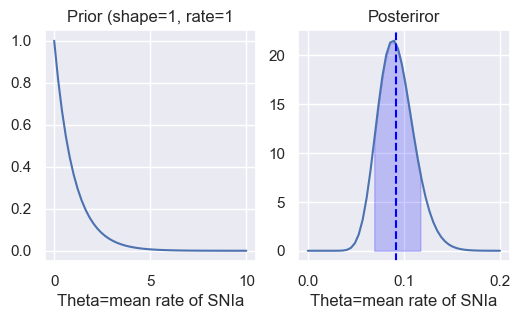

Post mean rate:  0.09230769230769231


In [123]:
#Plotting Prior and Posterior

x_prior = np.linspace(0,10)
y_prior = gamma.pdf(x_prior, a = prior_shape, scale = 1/prior_rate)

x_post = np.linspace(0,.2)
y_post = gamma.pdf(x_post, a = post_shape, scale = 1/post_rate)
fig, ax = plt.subplots(figsize = (6,3),
                       
ncols = 2,
nrows = 1)

ax[0].plot(x_prior, y_prior)
ax[0].set_title('Prior (shape=1, rate=1')
ax[0].set_xlabel('Theta=mean rate of SNIa')
ax[1].plot(x_post, y_post)
ax[1].set_title('Posteriror')
ax[1].set_xlabel('Theta=mean rate of SNIa')

ax[1].axvline(post_mean, color = 'blue', ls = '--')
x_post_fill = np.linspace(post_lb, post_ub, 10)
y_post_fill = gamma.pdf(x_post_fill, a = post_shape, scale = 1/post_rate)
ax[1].fill_between(x_post_fill, np.zeros(10), y_post_fill, color = 'blue', alpha = 0.2)
plt.show()

print("Post mean rate: ", post_mean)

### Prior Predictive Check
Since our data gives an average rate of less than one cluster per year, we expect our prior distribution to be centered this average.

In [122]:
#Checking that our prior hyperparameters are appropriate given the data

msim = 100
t = 74*3.5
a = 0.001
b = 0.001

priorpred_dat1 = np.zeros(msim)

for i in range(msim):
    theta = gamma.rvs(a = a, scale = 1/b, size = 1)
    priorpred_dat1[i] = poisson.rvs(theta*t, size = 1)

pd.Series(priorpred_dat1[:]).describe()

#

a = 1
b = 1

priorpred_dat2 = np.zeros(msim)

for i in range(msim):
    theta = gamma.rvs(a = a, scale = 1/b, size = 1, random_state = 5731)
    priorpred_dat2[i] = poisson.rvs(theta*t, size = 1)

pd.Series(priorpred_dat2[:]).describe() 

#

a = 2
b = 20

priorpred_dat3 = np.zeros(msim)

for i in range(msim):
    theta = gamma.rvs(a = a, scale = 1/b, size = 1, random_state = 5731)
    priorpred_dat3[i] = poisson.rvs(theta*t, size = 1)

pd.Series(priorpred_dat3[:]).describe() 

#

a = 10
b = 2

priorpred_dat4 = np.zeros(msim)

for i in range(msim):
    theta = gamma.rvs(a = a, scale = 1/b, size = 1, random_state = 5731)
    priorpred_dat2[i] = poisson.rvs(theta*t, size = 1)

pd.Series(priorpred_dat2[:]).describe() 

pp_dat1 = priorpred_dat1[:]
pp_dat2 = priorpred_dat2[:]
pp_dat3 = priorpred_dat3[:]
pp_dat4 = priorpred_dat4[:]
sns.set()

/var/folders/nv/zss1vllj0ng4zcrk888wbjh80000gn/T/ipykernel_90398/3051044460.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  priorpred_dat1[i] = poisson.rvs(theta*t, size = 1)
/var/folders/nv/zss1vllj0ng4zcrk888wbjh80000gn/T/ipykernel_90398/3051044460.py:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  priorpred_dat2[i] = poisson.rvs(theta*t, size = 1)
/var/folders/nv/zss1vllj0ng4zcrk888wbjh80000gn/T/ipykernel_90398/3051044460.py:38: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprec

## Sensitivity Analysis

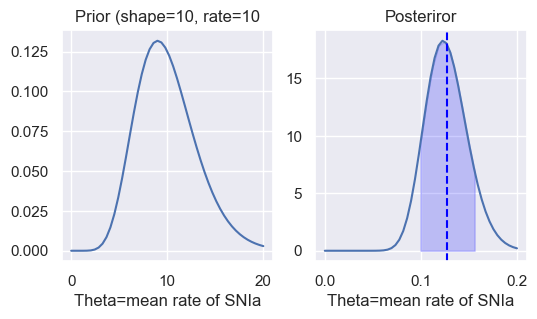

Post mean rate:  0.12692307692307692


In [126]:
# Change a and b to see how much of an influence it has on posterior
prior_shape = 10
prior_shape = 10

post_shape = prior_shape + nobs
post_rate = prior_rate + t

post_mean = post_shape/post_rate

post_lb = gamma.ppf(0.1, a = post_shape, scale = 1/post_rate) #inverse cumulative density
post_ub = gamma.ppf(0.9, a = post_shape, scale = 1/post_rate)

x_prior = np.linspace(0,20)
y_prior = gamma.pdf(x_prior, a = prior_shape, scale = 1/prior_rate)

x_post = np.linspace(0,.2)
y_post = gamma.pdf(x_post, a = post_shape, scale = 1/post_rate)
fig, ax = plt.subplots(figsize = (6,3),
                       
ncols = 2,
nrows = 1)

ax[0].plot(x_prior, y_prior)
ax[0].set_title('Prior (shape=10, rate=10')
ax[0].set_xlabel('Theta=mean rate of SNIa')
ax[1].plot(x_post, y_post)
ax[1].set_title('Posteriror')
ax[1].set_xlabel('Theta=mean rate of SNIa')

ax[1].axvline(post_mean, color = 'blue', ls = '--')
x_post_fill = np.linspace(post_lb, post_ub, 10)
y_post_fill = gamma.pdf(x_post_fill, a = post_shape, scale = 1/post_rate)
ax[1].fill_between(x_post_fill, np.zeros(10), y_post_fill, color = 'blue', alpha = 0.2)
plt.show()

print("Post mean rate: ", post_mean)

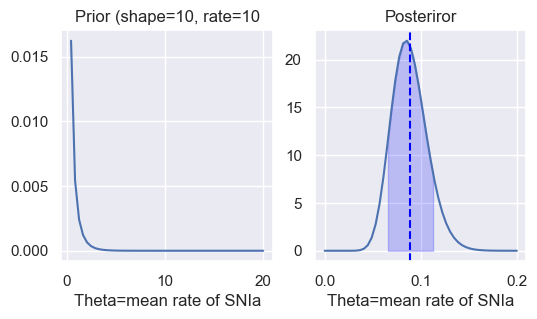

Post mean rate:  0.08850000000000001


In [127]:
# Change a and b to see how much of an influence it has on posterior
prior_shape = 0.01
prior_shape = 0.01

post_shape = prior_shape + nobs
post_rate = prior_rate + t

post_mean = post_shape/post_rate

post_lb = gamma.ppf(0.1, a = post_shape, scale = 1/post_rate) #inverse cumulative density
post_ub = gamma.ppf(0.9, a = post_shape, scale = 1/post_rate)

x_prior = np.linspace(0,20)
y_prior = gamma.pdf(x_prior, a = prior_shape, scale = 1/prior_rate)

x_post = np.linspace(0,.2)
y_post = gamma.pdf(x_post, a = post_shape, scale = 1/post_rate)
fig, ax = plt.subplots(figsize = (6,3),
                       
ncols = 2,
nrows = 1)

ax[0].plot(x_prior, y_prior)
ax[0].set_title('Prior (shape=10, rate=10')
ax[0].set_xlabel('Theta=mean rate of SNIa')
ax[1].plot(x_post, y_post)
ax[1].set_title('Posteriror')
ax[1].set_xlabel('Theta=mean rate of SNIa')

ax[1].axvline(post_mean, color = 'blue', ls = '--')
x_post_fill = np.linspace(post_lb, post_ub, 10)
y_post_fill = gamma.pdf(x_post_fill, a = post_shape, scale = 1/post_rate)
ax[1].fill_between(x_post_fill, np.zeros(10), y_post_fill, color = 'blue', alpha = 0.2)
plt.show()

print("Post mean rate: ", post_mean)

It looks like choosing a and b < 1 has a very small effect on the posterior mean (0.08), whereas choosing a large a and b (10) has a much larger effect, causing the mean rate to be much higher than our data shows (0.12)

## Conclusions

Our estimated rate of SN type Ia is stored in the variable post_mean. If we want to observe 100 SN over 5 clusters, we need to divide 100 by our final rate estimate, and then also divide by 5 (over five clusters).

In [128]:
estimated_time = 100/(post_mean*5)
print("Estimated time to observe 100 SN Ia in 5 clusters: ", estimated_time, "years")

Estimated time to observe 100 SN Ia in 5 clusters:  225.9887005649717 years
